In [ ]:
import os
import shutil
import random
import math
import numpy as np
import zipfile
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
import keras
from keras import optimizers
from keras import regularizers
import tensorflow as tf
from PIL import Image
import cv2

In [ ]:
path_train=r'/content/drive/MyDrive/dataset_cropped/10x_train'
path_test =r'/content/drive/MyDrive/dataset_cropped/10x_test'

print(f"We have total {len(os.listdir(path_train))} images in our training data.")
print(f"We have total {len(os.listdir(path_test))} images in our testing data.")

#print(f"First 20 filenames: \n {os.listdir(path)[:20]}")

We have total 203 images in our training data.
We have total 87 images in our testing data.


In [ ]:
images_train =os.listdir(path_train)
images_test =os.listdir(path_test)

In [ ]:
labels_train, heights_train, widths_train, channels_train, filesize_train = [], [], [], [], []
labels_test, heights_test, widths_test, channels_test, filesize_test = [], [], [], [], []

for fname_train in images_train:
    labels_train.append(str(fname_train)[:3])

    #img_shape_train = mpimg.imread(path_train + '/' + fname_train).shape

    #heights_train.append(img_shape[0])
    #widths_train.append(img_shape[1])

for fname_test in images_test:
    labels_test.append(str(fname_test)[:3])

    #img_shape_test = mpimg.imread(path_test + '/' + fname_test).shape
    #heights_test.append(img_shape[0])
    #widths_test.append(img_shape[1])

In [ ]:
for i in range(len(images_train)):
  img_train=cv2.imread(path_train + '/' + fname_train)
  img_train = cv2.resize(img_train, (600,600))
  img_train = np.asarray(img_train, dtype=np.float32)
  img_train /= 255
  images_train[i] = img_train

for i in range(len(images_test)):
  img_test=cv2.imread(path_test + '/' + fname_test)
  img_test = cv2.resize(img_test, (600,600))
  img_test = np.asarray(img_test, dtype=np.float32)
  img_test /= 255
  images_test[i] = img_test

In [ ]:
for i in range(len(labels_train)):
  if labels_train[i] == 'gr1':
    labels_train[i] = 1
  if labels_train[i] == 'gr2':
    labels_train[i] = 2
  if labels_train[i] == 'gr3':
    labels_train[i] = 3
  if labels_train[i] == 'nrm':
    labels_train[i] = 0

for i in range(len(labels_test)):
  if labels_test[i] == 'gr1':
    labels_test[i] = 1
  if labels_test[i] == 'gr2':
    labels_test[i] = 2
  if labels_test[i] == 'gr3':
    labels_test[i] = 3
  if labels_test[i] == 'nrm':
    labels_test[i] = 0

In [ ]:
x_train = images_train
x_test = images_test
y_train = labels_train
y_test = labels_test

In [ ]:
y_train = keras.utils.to_categorical(y_train, 4)
y_test = keras.utils.to_categorical(y_test, 4)

In [ ]:
x_train = np.asarray(x_train, dtype=np.float32)
x_test = np.asarray(x_test, dtype=np.float32)

In [ ]:
x_train.shape

(203, 600, 600, 3)

In [ ]:
x_test.shape

(87, 600, 600, 3)

In [ ]:
#from tensorflow.keras.layers import Dense, BatchNormalization
model=models.Sequential()
model.add(layers.Conv2D(8 ,(3,3) , activation='relu' ,input_shape=x_train.shape[1:] ) )
model.add(layers.MaxPooling2D( (2,2)))
model.add(layers.Conv2D(8, (3,3) , activation='relu'))
model.add(layers.MaxPooling2D( (2,2)))
model.add(layers.Flatten() )
model.add(layers.Dropout(0.1))
model.add(layers.Dense(16 , kernel_regularizer=regularizers.l2(0.01), activation='relu' ))
#BatchNormalization()
model.add(tf.keras.layers.Dense(4, activation = 'softmax'))

In [ ]:
from keras.optimizers import SGD
#opt = SGD(lr=0.1)
#model.compile(loss = "categorical_crossentropy", optimizer = opt, metrics=['accuracy'])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
data_augmentation = True
if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=10,
              epochs=10,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=True,  # set input mean to 0 over the dataset
        samplewise_center=True,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=45,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True)  # randomly flip images

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    history = model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=10),
                        steps_per_epoch=x_train.shape[0] // 10,
                        epochs=10,
                        validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Using real-time data augmentation.


<ipython-input-15-a56674b7ebcc>:29: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(x_train, y_train,


Epoch 1/10
20/20 [==============================] - 72s 4s/step - loss: 2.0517 - accuracy: 0.4145 - val_loss: 1.5266 - val_accuracy: 0.3678
Epoch 2/10
20/20 [==============================] - 66s 3s/step - loss: 1.3923 - accuracy: 0.5130 - val_loss: 1.5549 - val_accuracy: 0.4943
Epoch 3/10
20/20 [==============================] - 70s 4s/step - loss: 1.2535 - accuracy: 0.5026 - val_loss: 2.0215 - val_accuracy: 0.3678
Epoch 4/10
20/20 [==============================] - 67s 3s/step - loss: 1.1876 - accuracy: 0.4715 - val_loss: 1.8076 - val_accuracy: 0.4943
Epoch 5/10
20/20 [==============================] - 68s 3s/step - loss: 1.1817 - accuracy: 0.4456 - val_loss: 2.1677 - val_accuracy: 0.4943
Epoch 6/10
20/20 [==============================] - 68s 3s/step - loss: 1.1238 - accuracy: 0.5130 - val_loss: 1.3393 - val_accuracy: 0.4943
Epoch 7/10
20/20 [==============================] - 67s 3s/step - loss: 1.0994 - accuracy: 0.4819 - val_loss: 1.1434 - val_accuracy: 0.4943
Epoch 8/10
20/20 [==

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

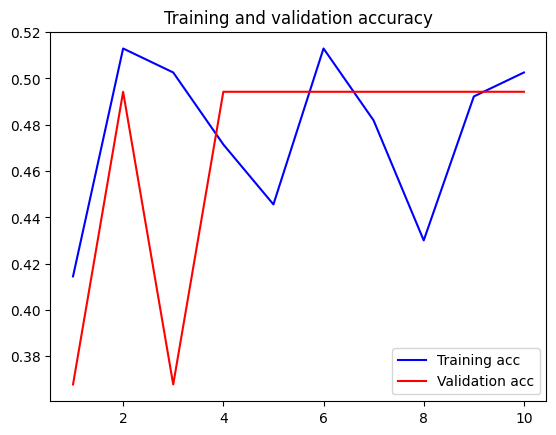

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

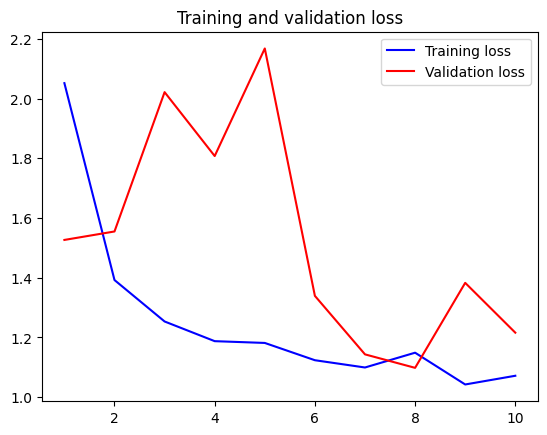

In [ ]:
epochs = range(1, len(acc) + 1)

plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()